# 电子产品的电商数据分析报告
- 通过分析销售数据来了解在线销售业务的消费情况，分析用户消费数据来分析用户的消费行为，为用户推荐相匹配的商品

In [6]:
#导入Python库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot') 
df=pd.read_csv('Sales analysis-0713.csv')
df=df.drop(['Unnamed: 0'],axis=1) #删除Unnamed: 0列
df.head(10) 

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,20.0,男,重庆
6,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京
7,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京
8,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京
9,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京


## 数据预处理和清洗
    时间格式转换
    缺失值查看
    删除重复值
    处理异常数据（无法填充，只能进行删除）

In [7]:
df.info()  #category_code，brand有缺失行，event_time需要进行时间格式转换

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 11 columns):
event_time       564169 non-null object
order_id         564169 non-null int64
product_id       564169 non-null int64
category_id      564169 non-null float64
category_code    434799 non-null object
brand            536945 non-null object
price            564169 non-null float64
user_id          564169 non-null float64
age              564169 non-null float64
sex              564169 non-null object
local            564169 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 47.3+ MB


In [30]:
np.sum(df.isnull(),axis=0) #每列的缺失数量
df.fillna(value='NaN',inplace=True)
np.sum(df.isnull())

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
month            0
week             0
day              0
hour             0
dtype: int64

In [29]:
df['event_time']=pd.to_datetime(df['event_time'])
df['month']=df['event_time'].dt.month
df['week']=df['event_time'].dt.dayofweek #返回星期几
df['day']=df['event_time'].dt.day
df['hour']=df['event_time'].dt.hour
df.head(10) 

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,month,week,day,hour
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,4,24,11
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,4,24,11
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,4,24,14
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,4,24,14
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东,4,4,24,19
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,20.0,男,重庆,4,6,26,8
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,4,6,26,9
7,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,4,6,26,9
8,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,4,6,26,9
9,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,4,6,26,9


In [33]:
# 重复值检查并删除
df.duplicated()
df.drop_duplicates()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,month,week,day,hour
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,4,24,11
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,4,24,14
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东,4,4,24,19
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,20.0,男,重庆,4,6,26,8
6,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,4,6,26,9
10,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,1.515916e+18,24.0,男,北京,4,6,26,14
11,2020-04-26 23:35:39,2296164324487463110,1515966223509259473,2.268105e+18,appliances.personal.scales,polaris,30.07,1.515916e+18,32.0,男,广东,4,6,26,23
12,2020-04-27 07:24:51,2296400480990920715,2273948308663698152,2.374499e+18,electronics.video.tv,samsung,416.64,1.515916e+18,16.0,女,北京,4,0,27,7
13,2020-04-27 14:57:22,2296628237930857206,1515966223509089660,2.268105e+18,computers.components.cpu,intel,91.41,1.515916e+18,49.0,女,浙江,4,0,27,14
16,2020-04-28 02:21:45,2296972701060825130,1515966223509104683,2.268105e+18,NaN,philips,23.13,1.515916e+18,21.0,男,广东,4,1,28,2


In [48]:
# 判断异常值
df=df.loc[~(df['price'] < 0)]

## 店铺销售情况：
    每月销售金额
    每月消费人数
    每月订单数量
    每月客单价
    不同省份用户数量
    不同省份订单数量
    不同省份成交金额
    订单数随星期分布
    订单随小时分布

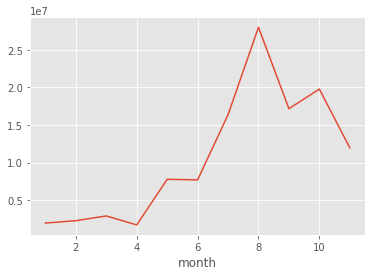

In [49]:
# 每月成交额
fig=plt.figure(figsize=(12,4))
df.groupby(by='month')['price'].sum().plot()

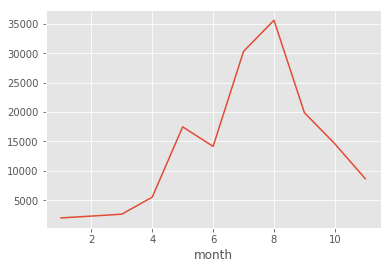

In [50]:
#每月消费人数
fig=plt.figure(figsize=(12,4))
df.groupby(by='month')['user_id'].nunique().plot()

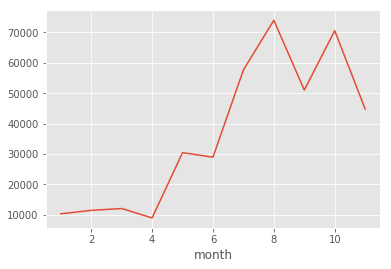

In [51]:
#每月订单数量
fig=plt.figure(figsize=(12,4))
df.groupby(by='month')['order_id'].nunique().plot()

## 结论
   - 订单数量有三个小高峰，分别在5月，8月，19月，可能与五一小长假，开学季，十一小长假有关 

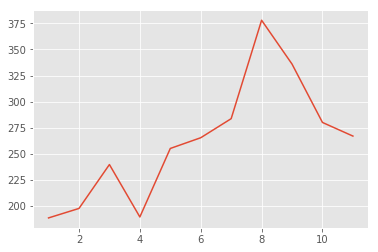

In [57]:
# 每月客单价
fig=plt.figure(figsize=(12,4))
data=df.groupby(by='month')['price'].sum()/df.groupby(by='month')['order_id'].nunique()
plt.plot(data)

## 结论：
   - 客单价由2个小高峰，分布在3月和8月
   - 8月份的客单价最高，说明8月份的需求量最高，客单价、订单数量达到顶峰，每年八月份是店铺全年营收的关键期，店铺要提前准备，保证货源供应，满足客户需求量。

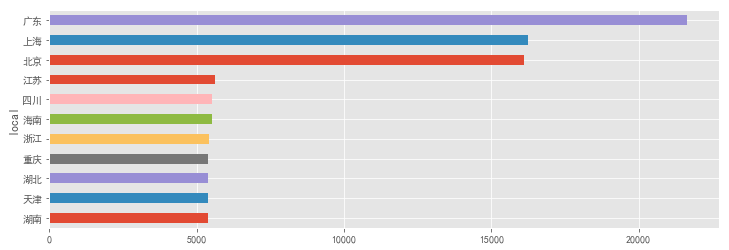

In [65]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
#不同省份用户数量
fig=plt.figure(figsize=(12,4))
df.groupby('local')['user_id'].nunique().sort_values().plot.barh()

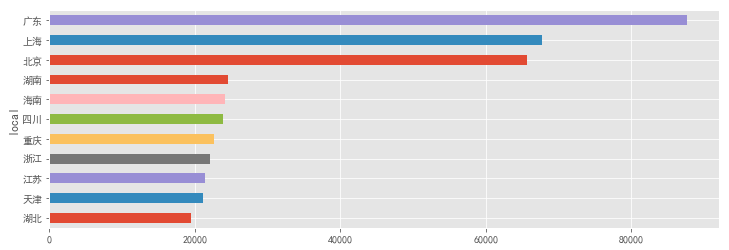

In [67]:
# 不同省份订单数量
fig=plt.figure(figsize=(12,4))
df.groupby('local')['order_id'].nunique().sort_values().plot.barh()

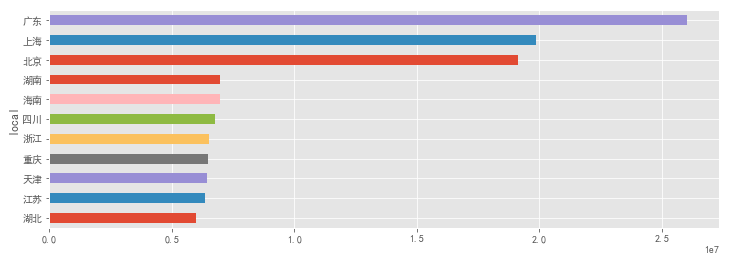

In [68]:
# 不同省份成交金额
fig=plt.figure(figsize=(12,4))
df.groupby('local')['price'].sum().sort_values().plot.barh()

## 结论
   - 1、北上广的用户数量、订单数量、成交金额都稳居前三。
   - 2、湖南的客户数量最好，但是订单数，客单价仅次于北上广，湖南客户的潜力巨大，需要加大宣传，增加客户数量。

Text(0.5,1,'订单数随星期变化')

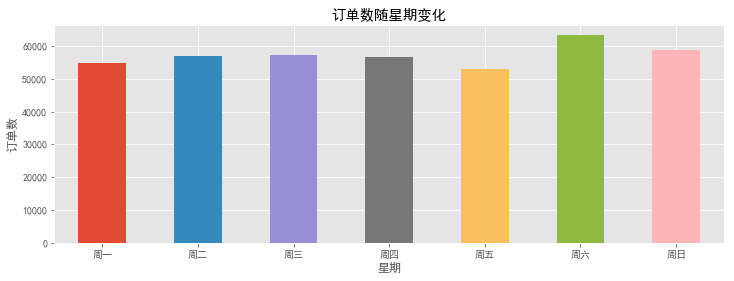

In [80]:
# 下单星期分布
fig=plt.figure(figsize=(12,4))
df.groupby('week')['order_id'].nunique().plot.bar()
plt.xticks(arange(7),['周一','周二','周三','周四','周五','周六','周日'],rotation=0)
plt.xlabel('星期')
plt.ylabel('订单数')
plt.title('订单数随星期变化')

## 结论
   - 周一到周五订单数维持稳定，周六是订单数量最高，周日次之。

Text(0.5,1,'订单随小时数变化')

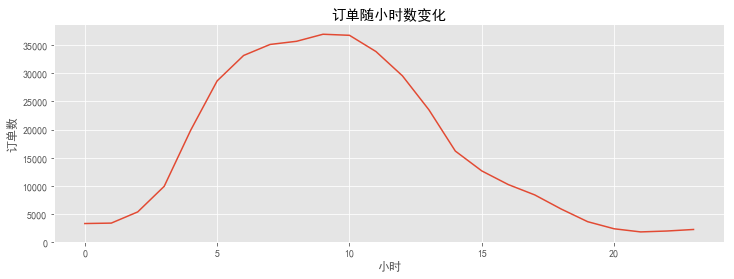

In [82]:
# 下单小时的分布
fig=plt.figure(figsize=(12,4))
df.groupby('hour')['order_id'].nunique().plot()
plt.xlabel('小时')
plt.ylabel('订单数')
plt.title('订单随小时数变化')

## 结论
   - 订单集中在早晨，8点到13点是消费高峰期，这段时间要注意维持好网站的稳定性。

## 用户消费行为分析：
    用户消费次数
    用户消费金额
    消费次数与消费金额关系
    用户购买周期
    新用户、活跃用户、不活跃用户、回流用户、回流率
    复购率和回流率

In [ ]:
# 用户消费次数(对用户分类)
fig=plt.figure(figsize=(12,4))
df.groupby('user_id')['order_id'].nunique().plot()

In [ ]:
# 用户消费金额
fig=plt.figure(figsize=(12,4))
df.groupby('user_id')['price'].sum().plot()

## 消费人群分层情况：
    按性别分析
    按年龄段分析
    按喜好品牌分析